In [2]:
!pip install jieba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 7.7 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314458 sha256=ab6a33a138924165f644732cdef35d3fe9b7fece3acb6c2076debb24ea8c4ac8
  Stored in directory: /home/iamlele/.cache/pip/wheels/ac/60/cf/538a1f183409caf1fc136b5d2c2dee329001ef6da2c5084bef
Successfully built jieba


In [3]:
# 导入程序所需要的程序包

#抓取网页内容用的程序包
import json
import requests

#PyTorch用的包
import torch
import torch.nn as nn
import torch.optim
#from torch.autograd import Variable

# 自然语言处理相关的包
import re #正则表达式的包
import jieba #结巴分词包
from collections import Counter #搜集器，可以让统计词频更简单

#绘图、计算用的程序包
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 一、数据处理

### 1、从京东上抓取评论数据

In [4]:
# 在指定的url处获得评论
def get_comments(url):
    comments = []
    # 打开指定页面
    resp = requests.get(url)
    resp.encoding = 'gbk'
    
    if resp.status_code != 200:
        return []
    
    #获得内容
    content = resp.text
    if content:
        #获得（）括号中的内容
        ind = content.find('(')
        s1 = content[ind+1:-2]
        try:
            js = json.loads(s1)
            #提取出comments字段的内容
            comment_infos = js['comments']
        except:
            print('error')
            return([])
        

        for comment_info in comment_infos:
            comment_content = comment_info['content']
            str1 = comment_content + '\n'
            comments.append(str1)
    return comments

good_comments = []


good_comment_url_templates = [
    'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv8914&productId=10359162198&score=3&sortType=5&page={}&pageSize=10&isShadowSku=0',
    'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv73&productId=10968941641&score=3&sortType=5&page={}&pageSize=10&isShadowSku=0',
    'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv4653&productId=10335204102&score=3&sortType=5&page={}&pageSize=10&isShadowSku=0',
    'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv1&productId=1269194114&score=3&sortType=5&page={}&pageSize=10&isShadowSku=0',
    'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv2777&productId=1409704820&score=3&sortType=5&page={}&pageSize=10&isShadowSku=0',
    'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv174&productId=10103790891&score=3&sortType=5&page={}&pageSize=10&isShadowSku=0',
    'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv9447&productId=1708318938&score=3&sortType=5&page={}&pageSize=10&isShadowSku=0',
    'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv111&productId=10849803616&score=3&sortType=5&page={}&pageSize=10&isShadowSku=0'
]

j=0
for good_comment_url_template in good_comment_url_templates:
    for i in range(100):
        url = good_comment_url_template.format(i)
        good_comments += get_comments(url)
        print('第{}条纪录，总文本长度{}'.format(j, len(good_comments)))
        j += 1

fw = open('data/good.txt', 'w')
fw.writelines(good_comments)

第0条纪录，总文本长度0
第1条纪录，总文本长度0
第2条纪录，总文本长度0
第3条纪录，总文本长度0
第4条纪录，总文本长度0
第5条纪录，总文本长度0
第6条纪录，总文本长度0
第7条纪录，总文本长度0
第8条纪录，总文本长度0
第9条纪录，总文本长度0
第10条纪录，总文本长度0
第11条纪录，总文本长度0
第12条纪录，总文本长度0
第13条纪录，总文本长度0
第14条纪录，总文本长度0
第15条纪录，总文本长度0
第16条纪录，总文本长度0
第17条纪录，总文本长度0
第18条纪录，总文本长度0
第19条纪录，总文本长度0
第20条纪录，总文本长度0
第21条纪录，总文本长度0
第22条纪录，总文本长度0
第23条纪录，总文本长度0
第24条纪录，总文本长度0
第25条纪录，总文本长度0
第26条纪录，总文本长度0
第27条纪录，总文本长度0
第28条纪录，总文本长度0
第29条纪录，总文本长度0
第30条纪录，总文本长度0
第31条纪录，总文本长度0
第32条纪录，总文本长度0
第33条纪录，总文本长度0
第34条纪录，总文本长度0
第35条纪录，总文本长度0
第36条纪录，总文本长度0
第37条纪录，总文本长度0
第38条纪录，总文本长度0
第39条纪录，总文本长度0
第40条纪录，总文本长度0
第41条纪录，总文本长度0
第42条纪录，总文本长度0
第43条纪录，总文本长度0
第44条纪录，总文本长度0
第45条纪录，总文本长度0
第46条纪录，总文本长度0
第47条纪录，总文本长度0
第48条纪录，总文本长度0
第49条纪录，总文本长度0
第50条纪录，总文本长度0
第51条纪录，总文本长度0
第52条纪录，总文本长度0
第53条纪录，总文本长度0
第54条纪录，总文本长度0
第55条纪录，总文本长度0
第56条纪录，总文本长度0
第57条纪录，总文本长度0
第58条纪录，总文本长度0
第59条纪录，总文本长度0
第60条纪录，总文本长度0
第61条纪录，总文本长度0
第62条纪录，总文本长度0
第63条纪录，总文本长度0
第64条纪录，总文本长度0
第65条纪录，总文本长度0
第66条纪录，总文本长度0
第67条纪录，总文本长度0
第68条纪录，总文本长度0
第69条纪录，总文本长度0
第70条纪录，总文本长度0
第71条纪录，总文本长度0
第7

KeyboardInterrupt: 

In [ ]:

bad_comments = []
bad_comment_url_templates = [
    'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv8914&productId=10359162198&score=1&sortType=5&page={}&pageSize=10&isShadowSku=0',
    'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv73&productId=10968941641&score=1&sortType=5&page={}&pageSize=10&isShadowSku=0',
    'http://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv4653&productId=10335204102&score=1&sortType=5&page={}&pageSize=10&isShadowSku=0',
    'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv1&productId=1269194114&score=1&sortType=5&page={}&pageSize=10&isShadowSku=0',
    'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv2777&productId=1409704820&score=1&sortType=5&page={}&pageSize=10&isShadowSku=0',
    'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv174&productId=10103790891&score=1&sortType=5&page={}&pageSize=10&isShadowSku=0',
    'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv9447&productId=1708318938&score=1&sortType=5&page={}&pageSize=10&isShadowSku=0',
    'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv111&productId=10849803616&score=1&sortType=5&page={}&pageSize=10&isShadowSku=0'
]

j = 0
for bad_comment_url_template in bad_comment_url_templates:
    for i in range(100):
        url = bad_comment_url_template.format(i)
        bad_comments += get_comments(url)
        print('第{}条纪录，总文本长度{}'.format(j, len(bad_comments)))
        j += 1

fw = open('data/bad.txt', 'w')
fw.writelines(bad_comments)

### 2.数据预处理

In [5]:
# 数据来源文件
good_file = 'data/good.txt'
bad_file  = 'data/bad.txt'

# 将文本中的标点符号过滤掉
def filter_punc(sentence):
    sentence = re.sub("[\s+\.\!\/_,$%^*(+\"\'“”《》?“]+|[+——！，。？、~@#￥%……&*（）：]+", "", sentence)  
    return(sentence)

#扫描所有的文本，分词、建立词典，分出正向还是负向的评论，is_filter可以过滤是否筛选掉标点符号
def Prepare_data(good_file, bad_file, is_filter = True):
    all_words = [] #存储所有的单词
    pos_sentences = [] #存储正向的评论
    neg_sentences = [] #存储负向的评论
    with open(good_file, 'r') as fr:
        for idx, line in enumerate(fr):
            if is_filter:
                #过滤标点符号
                line = filter_punc(line)
            #分词
            words = jieba.lcut(line)
            if len(words) > 0:
                all_words += words
                pos_sentences.append(words)
    print('{0} 包含 {1} 行, {2} 个词.'.format(good_file, idx+1, len(all_words)))

    count = len(all_words)
    with open(bad_file, 'r') as fr:
        for idx, line in enumerate(fr):
            if is_filter:
                line = filter_punc(line)
            words = jieba.lcut(line)
            if len(words) > 0:
                all_words += words
                neg_sentences.append(words)
    print('{0} 包含 {1} 行, {2} 个词.'.format(bad_file, idx+1, len(all_words)-count))

    #建立词典，diction的每一项为{w:[id, 单词出现次数]}
    diction = {}
    cnt = Counter(all_words)
    for word, freq in cnt.items():
        diction[word] = [len(diction), freq]
    print('字典大小：{}'.format(len(diction)))
    return(pos_sentences, neg_sentences, diction)

#根据单词返还单词的编码
def word2index(word, diction):
    if word in diction:
        value = diction[word][0]
    else:
        value = -1
    return(value)

#根据编码获得单词
def index2word(index, diction):
    for w,v in diction.items():
        if v[0] == index:
            return(w)
    return(None)

pos_sentences, neg_sentences, diction = Prepare_data(good_file, bad_file, True)
st = sorted([(v[1], w) for w, v in diction.items()])
st


Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.557 seconds.
Prefix dict has been built successfully.


data/good.txt 包含 8089 行, 100839 个词.
data/bad.txt 包含 5076 行, 56070 个词.
字典大小：7135


[(1, '---'),
 (1, '------'),
 (1, '000000000'),
 (1, '0000000000000000'),
 (1, '00000000000000000'),
 (1, '0000000000000000000000'),
 (1, '000000000000000000000000000'),
 (1, '00000000000000000000000000000000000000000000000'),
 (1, '1006'),
 (1, '111'),
 (1, '1111111'),
 (1, '11111111111'),
 (1, '11111111111111'),
 (1, '111111111111111111111111'),
 (1, '11111111111111111111111111111'),
 (1, '111111111111111111111111111111111'),
 (1, '1111111111111111111111111111111111111111111'),
 (1, '115'),
 (1, '122'),
 (1, '12315'),
 (1, '123456'),
 (1, '1255888'),
 (1, '128'),
 (1, '130'),
 (1, '136'),
 (1, '138'),
 (1, '15548'),
 (1, '158105'),
 (1, '160'),
 (1, '16067cm'),
 (1, '165140'),
 (1, '165cm'),
 (1, '166cm68kgxl'),
 (1, '16860'),
 (1, '170CM55'),
 (1, '170M'),
 (1, '170cm75kg'),
 (1, '171819202122'),
 (1, '172'),
 (1, '172153'),
 (1, '175cm'),
 (1, '1805'),
 (1, '180xxl'),
 (1, '183'),
 (1, '185'),
 (1, '1852XL'),
 (1, '185XXL'),
 (1, '185mm'),
 (1, '200000000'),
 (1, '20161218'),
 (1, 

## 二、词袋模型



### 1. 训练数据准备

In [6]:
# 输入一个句子和相应的词典，得到这个句子的向量化表示
# 向量的尺寸为词典中词汇的个数，i位置上面的数值为第i个单词在sentence中出现的频率
def sentence2vec(sentence, dictionary):
    vector = np.zeros(len(dictionary))
    for l in sentence:
        vector[l] += 1
    return(1.0 * vector / len(sentence))

# 遍历所有句子，将每一个词映射成编码
dataset = [] #数据集
labels = [] #标签
sentences = [] #原始句子，调试用
# 处理正向评论
for sentence in pos_sentences:
    new_sentence = []
    for l in sentence:
        if l in diction:
            new_sentence.append(word2index(l, diction))
    dataset.append(sentence2vec(new_sentence, diction))
    labels.append(0) #正标签为0
    sentences.append(sentence)

# 处理负向评论
for sentence in neg_sentences:
    new_sentence = []
    for l in sentence:
        if l in diction:
            new_sentence.append(word2index(l, diction))
    dataset.append(sentence2vec(new_sentence, diction))
    labels.append(1) #负标签为1
    sentences.append(sentence)

#打乱所有的数据顺序，形成数据集
# indices为所有数据下标的一个全排列
indices = np.random.permutation(len(dataset))

#重新根据打乱的下标生成数据集dataset，标签集labels，以及对应的原始句子sentences
dataset = [dataset[i] for i in indices]
labels = [labels[i] for i in indices]
sentences = [sentences[i] for i in indices]

#对整个数据集进行划分，分为：训练集、校准集和测试集，其中校准和测试集合的长度都是整个数据集的10分之一
test_size = len(dataset) // 10
train_data = dataset[2 * test_size :]
train_label = labels[2 * test_size :]

valid_data = dataset[: test_size]
valid_label = labels[: test_size]

test_data = dataset[test_size : 2 * test_size]
test_label = labels[test_size : 2 * test_size]

### 2. 模型定义

In [7]:
# 一个简单的前馈神经网络，三层，第一层线性层，加一个非线性ReLU，第二层线性层，中间有10个隐含层神经元

# 输入维度为词典的大小：每一段评论的词袋模型
model = nn.Sequential(
    nn.Linear(len(diction), 10),
    nn.ReLU(),
    nn.Linear(10, 2),
    nn.LogSoftmax(dim=1),
)

def rightness(predictions, labels):
    """计算预测错误率的函数，其中predictions是模型给出的一组预测结果，batch_size行num_classes列的矩阵，labels是数据之中的正确答案"""
    pred = torch.max(predictions.data, 1)[1] # 对于任意一行（一个样本）的输出值的第1个维度，求最大，得到每一行的最大元素的下标
    rights = pred.eq(labels.data.view_as(pred)).sum() #将下标与labels中包含的类别进行比较，并累计得到比较正确的数量
    return rights, len(labels) #返回正确的数量和这一次一共比较了多少元素

### 3. 训练模型

In [9]:
# 损失函数为交叉熵
cost = torch.nn.NLLLoss()
# 优化算法为Adam，可以自动调节学习率
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
records = []

#循环10个Epoch
losses = []
for epoch in range(10):
    for i, data in enumerate(zip(train_data, train_label)):
        x, y = data
        
        # 需要将输入的数据进行适当的变形，主要是要多出一个batch_size的维度，也即第一个为1的维度
        x = torch.tensor(x, requires_grad = True, dtype = torch.float).view(1,-1)
        # x的尺寸：batch_size=1, len_dictionary
        # 标签也要加一层外衣以变成1*1的张量
        y = torch.tensor(np.array([y]), dtype = torch.long)
        # y的尺寸：batch_size=1, 1
        
        # 清空梯度
        optimizer.zero_grad()
        # 模型预测
        predict = model(x)
        # 计算损失函数
        loss = cost(predict, y)
        # 将损失函数数值加入到列表中
        losses.append(loss.data.numpy())
        # 开始进行梯度反传
        loss.backward()
        # 开始对参数进行一步优化
        optimizer.step()
        
        # 每隔3000步，跑一下校验数据集的数据，输出临时结果
        if i % 3000 == 0:
            val_losses = []
            rights = []
            # 在所有校验数据集上实验
            for j, val in enumerate(zip(valid_data, valid_label)):
                x, y = val
                x = torch.tensor(x, requires_grad = True, dtype = torch.float).view(1,-1)
                y = torch.tensor(np.array([y]), dtype = torch.long)
                predict = model(x)
                # 调用rightness函数计算准确度
                right = rightness(predict, y)
                rights.append(right)
                loss = cost(predict, y)
                val_losses.append(loss.data.numpy())
                
            # 将校验集合上面的平均准确度计算出来
            right_ratio = 1.0 * np.sum([i[0] for i in rights]) / np.sum([i[1] for i in rights])
            print('第{}轮，训练损失：{:.2f}, 校验损失：{:.2f}, 校验准确率: {:.2f}'.format(epoch, np.mean(losses),
                                                                        np.mean(val_losses), right_ratio))
            records.append([np.mean(losses), np.mean(val_losses), right_ratio])
            

第0轮，训练损失：0.00, 校验损失：0.32, 校验准确率: 0.91
第0轮，训练损失：0.15, 校验损失：0.36, 校验准确率: 0.91
第0轮，训练损失：0.16, 校验损失：0.34, 校验准确率: 0.90
第0轮，训练损失：0.18, 校验损失：0.32, 校验准确率: 0.91
第1轮，训练损失：0.18, 校验损失：0.31, 校验准确率: 0.91
第1轮，训练损失：0.17, 校验损失：0.36, 校验准确率: 0.91
第1轮，训练损失：0.17, 校验损失：0.34, 校验准确率: 0.90
第1轮，训练损失：0.18, 校验损失：0.34, 校验准确率: 0.91
第2轮，训练损失：0.18, 校验损失：0.32, 校验准确率: 0.91
第2轮，训练损失：0.17, 校验损失：0.37, 校验准确率: 0.91
第2轮，训练损失：0.17, 校验损失：0.35, 校验准确率: 0.90
第2轮，训练损失：0.17, 校验损失：0.34, 校验准确率: 0.91
第3轮，训练损失：0.17, 校验损失：0.32, 校验准确率: 0.91
第3轮，训练损失：0.17, 校验损失：0.37, 校验准确率: 0.91
第3轮，训练损失：0.17, 校验损失：0.35, 校验准确率: 0.90
第3轮，训练损失：0.17, 校验损失：0.35, 校验准确率: 0.91
第4轮，训练损失：0.17, 校验损失：0.33, 校验准确率: 0.91
第4轮，训练损失：0.17, 校验损失：0.37, 校验准确率: 0.91
第4轮，训练损失：0.17, 校验损失：0.37, 校验准确率: 0.90
第4轮，训练损失：0.17, 校验损失：0.36, 校验准确率: 0.91
第5轮，训练损失：0.17, 校验损失：0.34, 校验准确率: 0.91
第5轮，训练损失：0.17, 校验损失：0.39, 校验准确率: 0.91
第5轮，训练损失：0.17, 校验损失：0.37, 校验准确率: 0.90
第5轮，训练损失：0.17, 校验损失：0.36, 校验准确率: 0.90
第6轮，训练损失：0.17, 校验损失：0.34, 校验准确率: 0.91
第6轮，训练损失：0.17, 校验损失：0.39, 校验准确率: 0.91
第6轮，训练损失：0.1

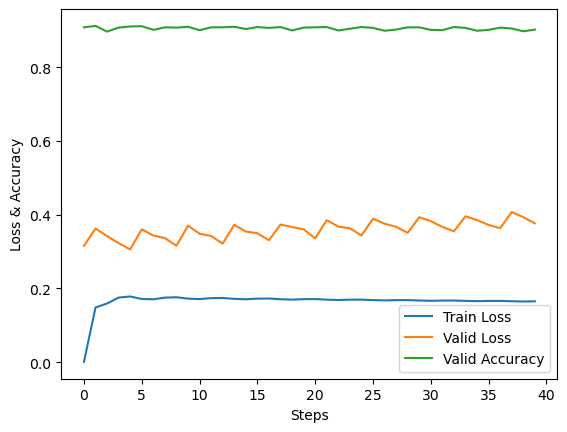

In [10]:
# 绘制误差曲线
a = [i[0] for i in records]
b = [i[1] for i in records]
c = [i[2] for i in records]
plt.plot(a, label = 'Train Loss')
plt.plot(b, label = 'Valid Loss')
plt.plot(c, label = 'Valid Accuracy')
plt.xlabel('Steps')
plt.ylabel('Loss & Accuracy')
plt.legend()

In [11]:

torch.save(model,'bow.mdl')
model = torch.load('bow.mdl')

In [12]:
#在测试集上分批运行，并计算总的正确率
vals = [] #记录准确率所用列表

#对测试数据集进行循环
for data, target in zip(test_data, test_label):
    data, target = torch.tensor(data, dtype = torch.float).view(1,-1), torch.tensor(np.array([target]), dtype = torch.long)
    output = model(data) #将特征数据喂入网络，得到分类的输出
    val = rightness(output, target) #获得正确样本数以及总样本数
    vals.append(val) #记录结果

#计算准确率
rights = (sum([tup[0] for tup in vals]), sum([tup[1] for tup in vals]))
right_rate = 1.0 * rights[0].data.numpy() / rights[1]
right_rate

0.9009976976208749

### 4. 解剖神经网络



#### 1). 查看每一层的模式

In [13]:
# 将神经网络的架构打印出来，方便后面的访问
model.named_parameters

<bound method Module.named_parameters of Sequential(
  (0): Linear(in_features=7135, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
  (3): LogSoftmax(dim=1)
)>

Text(0, 0.5, 'Weights')

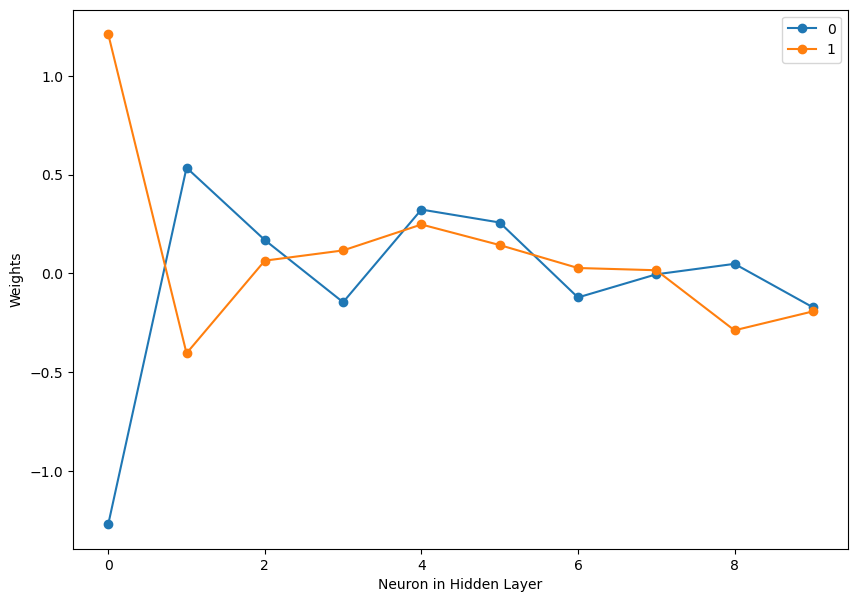

In [14]:

plt.figure(figsize = (10, 7))
for i in range(model[2].weight.size()[0]):
    #if i == 1:
        weights = model[2].weight[i].data.numpy()
        plt.plot(weights, 'o-', label = i)
plt.legend()
plt.xlabel('Neuron in Hidden Layer')
plt.ylabel('Weights')

Text(0, 0.5, 'Weights')

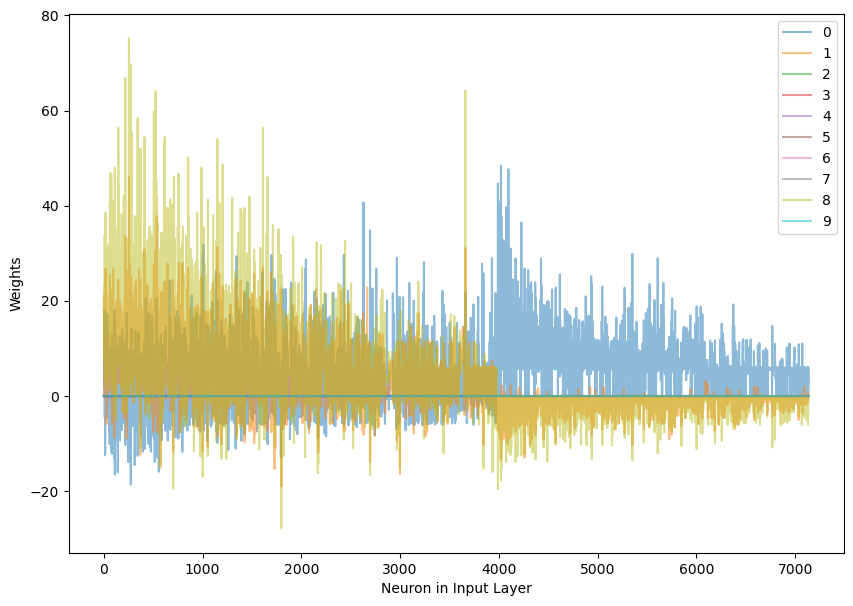

In [15]:

plt.figure(figsize = (10, 7))
for i in range(model[0].weight.size()[0]):
    #if i == 1:
        weights = model[0].weight[i].data.numpy()
        plt.plot(weights, alpha = 0.5, label = i)
plt.legend()
plt.xlabel('Neuron in Input Layer')
plt.ylabel('Weights')

In [16]:


for i in range(len(model[0].weight)):
    print('\n')
    print('第{}个神经元'.format(i))
    print('max:')
    st = sorted([(w,i) for i,w in enumerate(model[0].weight[i].data.numpy())])
    for i in range(1, 20):
        word = index2word(st[-i][1],diction)
        print(word)
    print('min:')
    for i in range(20):
        word = index2word(st[i][1],diction)
        print(word)




第0个神经元
max:
差劲
地摊货
很差
一星
严重
不如
发错
丢
忽悠
玩意
退款
别
差差
千万
骗
痒
要死
失败
后面
min:
完全一致
惊喜
力
还会来
继续
实惠
正合适
耐心
试试
挺不错
果然
没得说
超值
不错
谢谢
购
吸引
先
感谢
可


第1个神经元
max:
耐心
没得说
划算
物有所值
nbsp
试
YY
点赞
疑问
透气性
棒
老板
quot
期望值
图案
不贵
超好
细节
一如既往
min:
垃圾
难看
千万别
太差
忽悠
差劲
明明
不好
醉
失败
差
区别
不想
痒
说话
一句
烂
发错
申请
差距


第2个神经元
max:
劲儿
齐全
皆
黑白
偏差
瞎眼
盖
有史以来
炒
衫
无良
卖鞋
偏贵
掂量
圆领
健身
可以
Ok
对齐
min:
柔软
及时
好评
发货
包装
衣服
手感
一个
值得
到位
拥有
客服
赞
一流
有型
烂死
平是
一百多
至今
下架


第3个神经元
max:
舍不得
假话
电话
质量保证
素雅
手刷单
冒牌货
更加
套餐
月
破皮
搞臭
本想
路摊
坐会
皮面
赔给
偏贵
偏大买
min:
一个
发货
及时
衣服
赞
手感
到位
柔软
包装
一流
有型
拥有
客服
值得
好评
半个
时候
上门
撸
造假


第4个神经元
max:
买回去
想不到
偷偷
礼物
大失所望
厚薄
跳线
双加绒
我
穿
好些
后悔
咧
坚持
信任
精良
心里
商贾
退
min:
及时
很
发货
阿
啦
掌柜
谢谢
造型
强力
毫无用处
这价
170cm75kg
后
厚厚的
空间
现金
rdquo
比不上
星是
威胁


第5个神经元
max:
堪比
舒服
下去
邮政
裏
磕碰
做个
女朋友
了解
真坑
再多添
肯爹
化学纤维
付
一心
不要紧
每件
例如
女生
min:
发货
手感
柔软
客服
一个
赞
一流
拥有
有型
衣服
到位
好评
及时
包装
值得
似的
只前
深圳
鞋边
真京


第6个神经元
max:
巴
咱们
长袖
敲門烦
亲已
所说
脚
半
进来
脚后
发货
实乃
偏红
边
过程
你妹
布条
黄
暂时
min:
不太好
蒙
网络
双鞋
死快
贵
好坏
拍货
无货
总
身穿
完全符合
缝住
一亮
己
这样的话
糊弄人
先给
薄度
马


第7个神经元
max:
忧
内存
好次
不周到
环境
库存


#### 2. 寻找判断错误的原因

In [17]:
# 收集到在测试集中判断错误的句子
wrong_sentences = []
targets = []
j = 0
sent_indices = []
for data, target in zip(test_data, test_label):
    predictions = model(torch.tensor(data, dtype = torch.float).view(1,-1))
    pred = torch.max(predictions.data, 1)[1]
    target = torch.tensor(np.array([target]), dtype = torch.long).view_as(pred)
    rights = pred.eq(target)
    indices = np.where(rights.numpy() == 0)[0]
    for i in indices:
        wrong_sentences.append(data)
        targets.append(target[i])
        sent_indices.append(test_size + j + i)
    j += len(target)

In [18]:
# 逐个查看出错的句子是什么
idx = 1
print(sent_indices)
print(sentences[sent_indices[idx]])
print(targets[idx].numpy())
lst = list(np.where(wrong_sentences[idx]>0)[0])
mm = list(map(lambda x:index2word(x, diction), lst))
print(mm)

[1303, 1309, 1317, 1325, 1338, 1341, 1347, 1386, 1388, 1399, 1400, 1421, 1445, 1462, 1479, 1481, 1488, 1489, 1493, 1512, 1513, 1544, 1553, 1558, 1560, 1565, 1570, 1575, 1587, 1604, 1665, 1666, 1672, 1678, 1680, 1681, 1682, 1692, 1718, 1747, 1758, 1765, 1794, 1795, 1805, 1806, 1808, 1811, 1822, 1829, 1834, 1844, 1866, 1913, 1962, 1965, 1971, 1979, 1988, 1990, 2000, 2007, 2011, 2014, 2064, 2069, 2075, 2109, 2112, 2126, 2131, 2151, 2157, 2168, 2172, 2186, 2187, 2188, 2189, 2193, 2195, 2196, 2212, 2216, 2220, 2226, 2264, 2271, 2290, 2303, 2329, 2331, 2340, 2345, 2358, 2364, 2373, 2375, 2386, 2395, 2399, 2400, 2405, 2407, 2408, 2419, 2424, 2435, 2440, 2442, 2450, 2455, 2461, 2479, 2481, 2483, 2484, 2495, 2497, 2515, 2518, 2525, 2529, 2548, 2551, 2554, 2566, 2585, 2600]
['PS', '我', '有', '去', '健身房', 'WORKOUT', '的', '虽然', '180CM90KG', '但', '因为', '比较', '结实', '比', '150', '斤', '的', '人', '还', '显瘦', '穿', '96A', '是', '很', '合适', '的']
1
['是', '我', '的', '还', '很', '结实', '穿', '合适', '人', '去', '比较', '有', '

In [19]:
# 观察第一层的权重与输入向量的内积结果，也就是对隐含层神经元的输入，其中最大数值对应的项就是被激活的神经元
# 负值最小的神经元就是被抑制的神经元
model[0].weight.data.numpy().dot(wrong_sentences[idx].reshape(-1, 1))

array([[ 2.20933312e+00],
       [ 7.19490879e+00],
       [-1.15246786e-03],
       [-1.16131335e-04],
       [-3.36336184e-03],
       [ 9.82962698e-04],
       [-3.69171472e-04],
       [-5.71887291e-05],
       [ 1.22249459e+01],
       [-2.14015131e-03]])

In [20]:
# 显示输入句子的非零项，即对应单词不为空的项，看它们到隐含层指定神经元的权重是多少
model[0].weight[0].data.numpy()[np.where(wrong_sentences[idx]>0)[0]]

array([ 4.00880718e+00,  3.69841361e+00,  4.86849022e+00,  1.51397002e+00,
        4.13841438e+00, -2.13495255e+00,  3.55876851e+00, -1.01226730e+01,
        6.59352255e+00,  1.06105385e+01,  1.89255387e-01,  2.87693596e+00,
        4.77628899e+00,  6.96273267e-01,  4.34952736e+00, -4.98872399e-01,
       -1.50316286e+00,  1.00983343e+01, -3.78415058e-03,  8.72445665e-03,
       -8.56507942e-03,  2.67087528e-03, -1.86278624e-03, -9.38197225e-03],
      dtype=float32)

## 三、RNN模型



### 1. 普通RNN模型

In [21]:

good_file = 'data/good.txt'
bad_file  = 'data/bad.txt'

pos_sentences, neg_sentences, diction = Prepare_data(good_file, bad_file, False)

data/good.txt 包含 8089 行, 136359 个词.
data/bad.txt 包含 5076 行, 75600 个词.
字典大小：7029


In [22]:


dataset = []
labels = []
sentences = []

# 正例集合
for sentence in pos_sentences:
    new_sentence = []
    for l in sentence:
        if l in diction:
            # 注意将每个词编码
            new_sentence.append(word2index(l, diction))
    #每一个句子都是一个不等长的整数序列
    dataset.append(new_sentence)
    labels.append(0)
    sentences.append(sentence)

# 反例集合
for sentence in neg_sentences:
    new_sentence = []
    for l in sentence:
        if l in diction:
            new_sentence.append(word2index(l, diction))
    dataset.append(new_sentence)
    labels.append(1)
    sentences.append(sentence)

# 重新对数据洗牌，构造数据集合
indices = np.random.permutation(len(dataset))
dataset = [dataset[i] for i in indices]
labels = [labels[i] for i in indices]
sentences = [sentences[i] for i in indices]

test_size = len(dataset) // 10

# 训练集
train_data = dataset[2 * test_size :]
train_label = labels[2 * test_size :]

# 校验集
valid_data = dataset[: test_size]
valid_label = labels[: test_size]

# 测试集
test_data = dataset[test_size : 2 * test_size]
test_label = labels[test_size : 2 * test_size]


In [23]:
# 一个手动实现的RNN模型

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        # 一个embedding层
        self.embed = nn.Embedding(input_size, hidden_size)
        # 隐含层内部的相互链接
        self.i2h = nn.Linear(2 * hidden_size, hidden_size)
        # 隐含层到输出层的链接
        self.i2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax()

    def forward(self, input, hidden):
        
        # 先进行embedding层的计算，它可以把一个数或者数列，映射成一个向量或一组向量
        # input尺寸：seq_length, 1
        x = self.embed(input)
        # x尺寸：hidden_size
        
        # 将输入和隐含层的输出（hidden）耦合在一起构成了后续的输入
        combined = torch.cat((x, hidden), 1)
        # combined尺寸：2*hidden_size
        #
        # 从输入到隐含层的计算
        hidden = self.i2h(combined)
        # combined尺寸：hidden_size
        
        # 从隐含层到输出层的运算
        output = self.i2o(hidden)
        # output尺寸：output_size
        
        # softmax函数
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        # 对隐含单元的初始化
        # 注意尺寸是：batch_size, hidden_size
        return torch.zeros(1, self.hidden_size)



In [24]:
# 开始训练这个RNN，10个隐含层单元
rnn = RNN(len(diction), 10, 2)

# 交叉熵评价函数
cost = torch.nn.NLLLoss()

# Adam优化器
optimizer = torch.optim.Adam(rnn.parameters(), lr = 0.001)
records = []

# 学习周期10次
losses = []
for epoch in range(10):
    
    for i, data in enumerate(zip(train_data, train_label)):
        x, y = data
        x = torch.tensor(x, dtype = torch.long).unsqueeze(1)
        #x尺寸：seq_length（序列的长度）
        y = torch.tensor(np.array([y]), dtype = torch.long)
        #x尺寸：batch_size = 1,1
        optimizer.zero_grad()
        
        #初始化隐含层单元全为0
        hidden = rnn.initHidden()
        # hidden尺寸：batch_size = 1, hidden_size
        
        #手动实现RNN的时间步循环，x的长度就是总的循环时间步，因为要把x中的输入句子全部读取完毕
        for s in range(x.size()[0]):
            output, hidden = rnn(x[s], hidden)
        
        #校验函数
        loss = cost(output, y)
        losses.append(loss.data.numpy())
        loss.backward()
        # 开始优化
        optimizer.step()
        if i % 3000 == 0:
            # 每间隔3000步来一次校验集上面的计算
            val_losses = []
            rights = []
            for j, val in enumerate(zip(valid_data, valid_label)):
                x, y = val
                x = torch.tensor(x, dtype = torch.long).unsqueeze(1)
                y = torch.tensor(np.array([y]), dtype = torch.long)
                hidden = rnn.initHidden()
                for s in range(x.size()[0]):
                    output, hidden = rnn(x[s], hidden)
                right = rightness(output, y)
                rights.append(right)
                loss = cost(output, y)
                val_losses.append(loss.data.numpy())
            # 计算准确度
            right_ratio = 1.0 * np.sum([i[0] for i in rights]) / np.sum([i[1] for i in rights])
            print('第{}轮，训练损失：{:.2f}, 测试损失：{:.2f}, 测试准确率: {:.2f}'.format(epoch, np.mean(losses),
                                                                        np.mean(val_losses), right_ratio))
            records.append([np.mean(losses), np.mean(val_losses), right_ratio])

/home/iamlele/anaconda3/lib/python3.11/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


第0轮，训练损失：0.59, 测试损失：0.71, 测试准确率: 0.47
第0轮，训练损失：0.55, 测试损失：0.46, 测试准确率: 0.81
第0轮，训练损失：0.54, 测试损失：0.44, 测试准确率: 0.81
第0轮，训练损失：0.49, 测试损失：0.37, 测试准确率: 0.86
第1轮，训练损失：0.47, 测试损失：0.36, 测试准确率: 0.87
第1轮，训练损失：0.44, 测试损失：0.36, 测试准确率: 0.88
第1轮，训练损失：0.41, 测试损失：0.34, 测试准确率: 0.87
第1轮，训练损失：0.40, 测试损失：0.33, 测试准确率: 0.88
第2轮，训练损失：0.39, 测试损失：0.32, 测试准确率: 0.89
第2轮，训练损失：0.38, 测试损失：0.33, 测试准确率: 0.89
第2轮，训练损失：0.37, 测试损失：0.32, 测试准确率: 0.89
第2轮，训练损失：0.36, 测试损失：0.31, 测试准确率: 0.90
第3轮，训练损失：0.35, 测试损失：0.31, 测试准确率: 0.89
第3轮，训练损失：0.35, 测试损失：0.31, 测试准确率: 0.90
第3轮，训练损失：0.34, 测试损失：0.31, 测试准确率: 0.90
第3轮，训练损失：0.33, 测试损失：0.30, 测试准确率: 0.90
第4轮，训练损失：0.33, 测试损失：0.31, 测试准确率: 0.90
第4轮，训练损失：0.32, 测试损失：0.34, 测试准确率: 0.90
第4轮，训练损失：0.32, 测试损失：0.30, 测试准确率: 0.90
第4轮，训练损失：0.32, 测试损失：0.30, 测试准确率: 0.90
第5轮，训练损失：0.31, 测试损失：0.31, 测试准确率: 0.90
第5轮，训练损失：0.31, 测试损失：0.31, 测试准确率: 0.90
第5轮，训练损失：0.30, 测试损失：0.30, 测试准确率: 0.90
第5轮，训练损失：0.30, 测试损失：0.30, 测试准确率: 0.90
第6轮，训练损失：0.30, 测试损失：0.30, 测试准确率: 0.89
第6轮，训练损失：0.30, 测试损失：0.30, 测试准确率: 0.90
第6轮，训练损失：0.2

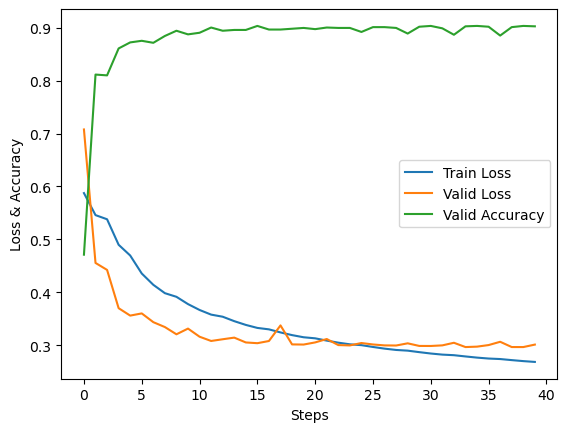

In [25]:
# 绘制误差曲线
a = [i[0] for i in records]
b = [i[1] for i in records]
c = [i[2] for i in records]
plt.plot(a, label = 'Train Loss')
plt.plot(b, label = 'Valid Loss')
plt.plot(c, label = 'Valid Accuracy')
plt.xlabel('Steps')
plt.ylabel('Loss & Accuracy')
plt.legend()

In [26]:
#在测试集上运行，并计算准确率
vals = [] #记录准确率所用列表
rights = []
#对测试数据集进行循环
for j, test in enumerate(zip(test_data, test_label)):
    x, y = test
    x = torch.LongTensor(x).unsqueeze(1)
    y = torch.LongTensor(np.array([y]))
    hidden = rnn.initHidden()
    for s in range(x.size()[0]):
        output, hidden = rnn(x[s], hidden)
    right = rightness(output, y)
    rights.append(right)
    val = rightness(output, y) #获得正确样本数以及总样本数
    vals.append(val) #记录结果

#计算准确率
rights = (sum([tup[0] for tup in vals]), sum([tup[1] for tup in vals]))
right_rate = 1.0 * rights[0].data.numpy() / rights[1]
right_rate

0.8791793313069909

In [27]:

#torch.save(rnn, 'rnn.mdl')
#rnn = torch.load('rnn.mdl')

## LSTM网络

普通RNN的效果并不好，我们尝试利用改进型的RNN，即LSTM。LSTM与RNN最大的区别就是在于每个神经元中多增加了3个控制门：遗忘门、输入门和输出门. 另外，在每个隐含层神经元中，LSTM多了一个cell的状态，起到了记忆的作用。

这就使得LSTM可以记忆更长时间的Pattern

In [28]:
class LSTMNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, n_layers=1):
        super(LSTMNetwork, self).__init__()
        self.n_layers = n_layers
        self.hidden_size = hidden_size

        
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, n_layers)
        self.fc = nn.Linear(hidden_size, 2)
        self.logsoftmax = nn.LogSoftmax()

    def forward(self, input, hidden=None):
        
        #input尺寸: seq_length
        #词向量嵌入
        embedded = self.embedding(input)
        #embedded尺寸: seq_length, hidden_size
        
        #PyTorch设计的LSTM层有一个特别别扭的地方是，输入张量的第一个维度需要是时间步，
        #第二个维度才是batch_size，所以需要对embedded变形
        embedded = embedded.view(input.data.size()[0], 1, self.hidden_size)
        #embedded尺寸: seq_length, batch_size = 1, hidden_size
    
        #调用PyTorch自带的LSTM层函数，注意有两个输入，一个是输入层的输入，另一个是隐含层自身的输入
        # 输出output是所有步的隐含神经元的输出结果，hidden是隐含层在最后一个时间步的状态。
        # 注意hidden是一个tuple，包含了最后时间步的隐含层神经元的输出，以及每一个隐含层神经元的cell的状态
        
        output, hidden = self.lstm(embedded, hidden)
        #output尺寸: seq_length, batch_size = 1, hidden_size
        #hidden尺寸: 二元组(n_layer = 1 * batch_size = 1 * hidden_size, n_layer = 1 * batch_size = 1 * hidden_size)
        
        #我们要把最后一个时间步的隐含神经元输出结果拿出来，送给全连接层
        output = output[-1,...]
        #output尺寸: batch_size = 1, hidden_size

        #全链接层
        out = self.fc(output)
        #out尺寸: batch_size = 1, output_size
        # softmax
        out = self.logsoftmax(out)
        return out

    def initHidden(self):
        # 对隐单元的初始化
        
        # 对隐单元输出的初始化，全0.
        # 注意hidden和cell的维度都是layers,batch_size,hidden_size
        hidden = torch.zeros(self.n_layers, 1, self.hidden_size)
        # 对隐单元内部的状态cell的初始化，全0
        cell = torch.zeros(self.n_layers, 1, self.hidden_size)
        return (hidden, cell)



In [29]:
# 开始训练LSTM网络

# 构造一个LSTM网络的实例
lstm = LSTMNetwork(len(diction), 10, 2)

#定义损失函数
cost = torch.nn.NLLLoss()

#定义优化器
optimizer = torch.optim.Adam(lstm.parameters(), lr = 0.001)
records = []

# 开始训练，一共5个epoch，否则容易过拟合
losses = []
for epoch in range(10):
    for i, data in enumerate(zip(train_data, train_label)):
        x, y = data
        x = torch.LongTensor(x).unsqueeze(1)
        #x尺寸：seq_length，序列的长度
        y = torch.LongTensor([y])
        #y尺寸：batch_size = 1, 1
        optimizer.zero_grad()
        
     
        hidden = lstm.initHidden()
        #hidden: 二元组(n_layer = 1 * batch_size = 1 * hidden_size, n_layer = 1 * batch_size = 1 * hidden_size)
        
        output = lstm(x, hidden)
        #output尺寸: batch_size = 1, output_size
        
        #损失函数
        loss = cost(output, y)
        losses.append(loss.data.numpy())
        
        #反向传播
        loss.backward()
        optimizer.step()
        
        #每隔3000步，跑一次校验集，并打印结果
        if i % 3000 == 0:
            val_losses = []
            rights = []
            for j, val in enumerate(zip(valid_data, valid_label)):
                x, y = val
                x = torch.LongTensor(x).unsqueeze(1)
                y = torch.LongTensor(np.array([y]))
                hidden = lstm.initHidden()
                output = lstm(x, hidden)
                #计算校验数据集上的分类准确度
                right = rightness(output, y)
                rights.append(right)
                loss = cost(output, y)
                val_losses.append(loss.data.numpy())
            right_ratio = 1.0 * np.sum([i[0] for i in rights]) / np.sum([i[1] for i in rights])
            print('第{}轮，训练损失：{:.2f}, 测试损失：{:.2f}, 测试准确率: {:.2f}'.format(epoch, np.mean(losses),
                                                                        np.mean(val_losses), right_ratio))
            records.append([np.mean(losses), np.mean(val_losses), right_ratio])
            

第0轮，训练损失：0.71, 测试损失：0.69, 测试准确率: 0.63
第0轮，训练损失：0.53, 测试损失：0.46, 测试准确率: 0.79
第0轮，训练损失：0.47, 测试损失：0.38, 测试准确率: 0.85
第0轮，训练损失：0.43, 测试损失：0.34, 测试准确率: 0.88
第1轮，训练损失：0.42, 测试损失：0.33, 测试准确率: 0.88
第1轮，训练损失：0.40, 测试损失：0.31, 测试准确率: 0.89
第1轮，训练损失：0.38, 测试损失：0.32, 测试准确率: 0.89
第1轮，训练损失：0.37, 测试损失：0.32, 测试准确率: 0.88
第2轮，训练损失：0.36, 测试损失：0.29, 测试准确率: 0.89
第2轮，训练损失：0.35, 测试损失：0.29, 测试准确率: 0.90
第2轮，训练损失：0.34, 测试损失：0.28, 测试准确率: 0.90
第2轮，训练损失：0.33, 测试损失：0.31, 测试准确率: 0.88
第3轮，训练损失：0.33, 测试损失：0.28, 测试准确率: 0.90
第3轮，训练损失：0.32, 测试损失：0.28, 测试准确率: 0.90
第3轮，训练损失：0.32, 测试损失：0.29, 测试准确率: 0.91
第3轮，训练损失：0.31, 测试损失：0.28, 测试准确率: 0.90
第4轮，训练损失：0.31, 测试损失：0.28, 测试准确率: 0.90
第4轮，训练损失：0.30, 测试损失：0.28, 测试准确率: 0.90
第4轮，训练损失：0.30, 测试损失：0.29, 测试准确率: 0.91
第4轮，训练损失：0.29, 测试损失：0.28, 测试准确率: 0.90
第5轮，训练损失：0.29, 测试损失：0.28, 测试准确率: 0.90
第5轮，训练损失：0.29, 测试损失：0.27, 测试准确率: 0.91
第5轮，训练损失：0.28, 测试损失：0.29, 测试准确率: 0.91
第5轮，训练损失：0.28, 测试损失：0.28, 测试准确率: 0.90
第6轮，训练损失：0.28, 测试损失：0.28, 测试准确率: 0.90
第6轮，训练损失：0.27, 测试损失：0.28, 测试准确率: 0.91
第6轮，训练损失：0.2

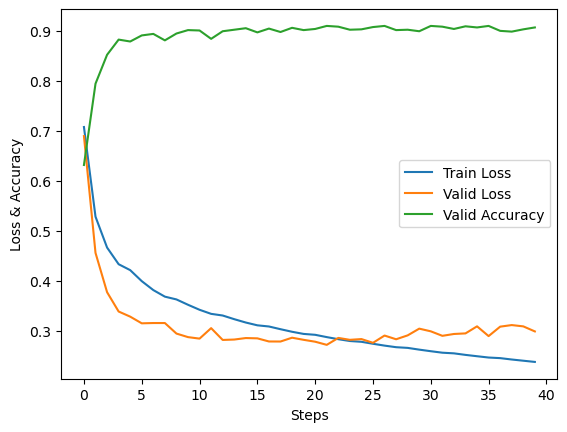

In [30]:
# 绘制误差曲线
a = [i[0] for i in records]
b = [i[1] for i in records]
c = [i[2] for i in records]
plt.plot(a, label = 'Train Loss')
plt.plot(b, label = 'Valid Loss')
plt.plot(c, label = 'Valid Accuracy')
plt.xlabel('Steps')
plt.ylabel('Loss & Accuracy')
plt.legend()

In [31]:
#在测试集上计算总的正确率
vals = [] #记录准确率所用列表

#对测试数据集进行循环
for j, test in enumerate(zip(test_data, test_label)):
    x, y = test
    x = torch.LongTensor(x).unsqueeze(1)
    y = torch.LongTensor(np.array([y]))
    hidden = lstm.initHidden()
    output = lstm(x, hidden)
    right = rightness(output, y)
    rights.append(right)
    val = rightness(output, y) #获得正确样本数以及总样本数
    vals.append(val) #记录结果

#计算准确率
rights = (sum([tup[0] for tup in vals]), sum([tup[1] for tup in vals]))
right_rate = 1.0 * rights[0].data.numpy() / rights[1]
right_rate

0.9042553191489362

In [ ]:
#保存、加载模型（为讲解用）
#torch.save(lstm, 'lstm.mdl')
#rnn = torch.load('rnn.mdl')